In [ ]:
import pandas as pd

data = pd.read_csv('vehicle.csv')
data.head(5)

,index,rank,cost,brand,fuel,ABS,safety
0,1,4,20m,hyundai,gas,no,4_stars
1,2,3,22m,hyundai,diesel,yes,4_stars
2,3,16,24m,daewoo,gas,yes,5_stars
3,4,15,24m,kia,diesel,no,5_stars
4,5,5,22m,hyundai,gas,no,5_stars


In [8]:
data_dummy = pd.get_dummies(data, columns=['cost', 'brand', 'fuel', 'ABS', 'safety'])
data_dummy.head(5)

,index,rank,cost_20m,cost_22m,cost_24m,brand_daewoo,brand_hyundai,brand_kia,fuel_diesel,fuel_gas,ABS_no,ABS_yes,safety_4_stars,safety_5_stars
0,1,4,True,False,False,False,True,False,False,True,True,False,True,False
1,2,3,False,True,False,False,True,False,True,False,False,True,True,False
2,3,16,False,False,True,True,False,False,False,True,False,True,False,True
3,4,15,False,False,True,False,False,True,True,False,True,False,False,True
4,5,5,False,True,False,False,True,False,False,True,True,False,False,True


In [9]:
import statsmodels.api as sm
# from statsmodels.formula.api import ols
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

X = data_dummy.drop(['rank', 'index'], axis=1)
y = -data_dummy['rank']    # 종속 변수의 부호를 마이너스(-)로 변경 : 중요도가 클 수록 Coefficient가 큰 양수가 되도록

In [10]:
# X
# y

In [11]:
# 에러 발생 (250313) 

linearRegression = sm.OLS(y, X)
res = linearRegression.fit()
res.summary()

c:\Users\wonta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     21.04
Date:                    목, 13 3 2025   Prob (F-statistic):           3.19e-05
Time:                        15:22:01   Log-Likelihood:                -30.377
No. Observations:                  18   AIC:                             76.75
Df Residuals:                      10   BIC:                             83.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cost_20m           1.6143      0.595      2.715      0.022       0.289       2.939
cost_22m          -1.2885      0.593     -2.172      0.055      -2.610       0.033
cost_24m          -4.4551      0.593     -7.510      0.000      -5.777      -3.133
brand_daewoo      -6.4551      0.593    -10.882      0.000      -7.777      -5.133
brand_hyundai      3.6143      0.595      6.079      0.000       2.289       4.939
brand_kia         -1.2885      0.593     -2.172      0.055      -2.610       0.033
fuel_diesel       -1.6237      0.488     -3.330      0.008      -2.710      -0.537
fuel_gas          -2.5056      0.418     -6.000      0.000      -3.436      -1.575
ABS_no            -3.7556      0.418     -8.994      0.000      -4.686      -2.825
ABS_yes           -0.3737      0.488     -0.766      0.461      -1.460       0.713
safety_4_stars    -2.7730      0.479     -5.790      0.000      -3.840      -1.706
safety_5_stars    -1.3563      0.424     -3.197      0.010      -2.302      -0.411
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.636
Skew:                          -0.183   Prob(JB):                        0.728
Kurtosis:                       2.155   Cond. No.                     3.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.72e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# 참고 문헌
# 1) 컨조인트 분석을 이용한 최적 상품 설계 분석방법과 적용 사례, 2006
# 2) 파이썬 비즈니스 통계 분석 -  15장 컨조인트 분석, 김형수 저

##### 평균 효용값의 비교

###### coef 값이 클 수록 선호도가 높은 것을 나타낸다 : -y 값으로 계산 참조
###### 소비자에게 가장 이상적인 자동차 : "brand_hyundai" + "cost_20m" + ""fuel_diesel" + "ABS_yes" + "safety_5"

##### 부분 가치(Part Worth)
###### 컨조인트 분석 : 어떤 제품이나 서비스, 매장 등에 대해서 여러가지 대안을 만들었을 때,
###### 그 대안들에 부여하는 소비자들의 선호도를 측정하여 
###### 소비자가 각 속성(attribute)에 부여하는 상대적 중요도(relative importance)dhk
###### 각 속성 수준의 효용(utility), 부분 가치(part worth)를 추정하는 분석 방법

In [13]:
import numpy as np

# 선형회귀 결과 값 추출
df_res = pd.DataFrame({'param_name': res.params.keys(),   # 파라미터 이름
                       'param_w': res.params.values,      # 가중치
                       'pval': res.pvalues})              # p-value

df_res

,param_name,param_w,pval
cost_20m,cost_20m,1.614316,2.174771e-02
cost_22m,cost_22m,-1.288462,5.498417e-02
cost_24m,cost_24m,-4.455128,2.038932e-05
brand_daewoo,brand_daewoo,-6.455128,7.289771e-07
brand_hyundai,brand_hyundai,3.614316,1.190185e-04
brand_kia,brand_kia,-1.288462,5.498417e-02
fuel_diesel,fuel_diesel,-1.623665,7.617165e-03
fuel_gas,fuel_gas,-2.505609,1.320688e-04
ABS_no,ABS_no,-3.755609,4.164494e-06
ABS_yes,ABS_yes,-0.373665,4.611657e-01


In [ ]:
# Adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])

# Marking field is significant under 95% confidence interval : p-value < 0.05 여부
df_res['is_sig_95'] = (df_res['pval'] < 0.05)

# constructing color naming for each param
df_res['color'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res =df_res.sort_values(by='abs_param_w', ascending=True)

# 깔떼기 모양의 그래프를 그리기 위하여 : 절대 값을 내림차순으로 정리리


In [15]:
df_res

,param_name,param_w,pval,abs_param_w,is_sig_95,color
ABS_yes,ABS_yes,-0.373665,4.611657e-01,0.373665,False,red
cost_22m,cost_22m,-1.288462,5.498417e-02,1.288462,False,red
brand_kia,brand_kia,-1.288462,5.498417e-02,1.288462,False,red
safety_5_stars,safety_5_stars,-1.356303,9.547726e-03,1.356303,True,blue
cost_20m,cost_20m,1.614316,2.174771e-02,1.614316,True,blue
fuel_diesel,fuel_diesel,-1.623665,7.617165e-03,1.623665,True,blue
fuel_gas,fuel_gas,-2.505609,1.320688e-04,2.505609,True,blue
safety_4_stars,safety_4_stars,-2.772970,1.754321e-04,2.772970,True,blue
brand_hyundai,brand_hyundai,3.614316,1.190185e-04,3.614316,True,blue
ABS_no,ABS_no,-3.755609,4.164494e-06,3.755609,True,blue


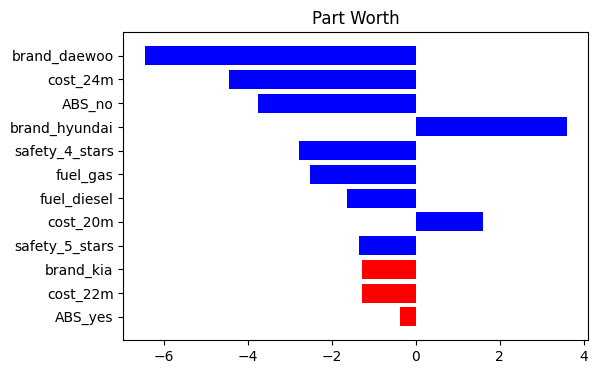

In [19]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(6, 4))

plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))

plt.barh(xbar, pwu, color=df_res['color'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [ ]:
# 부분 가치(Part Worth) : "brand_hyundai" + "cost_20m"
# Red : p-value > 0.05 항목